## Random Forest Classifier

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Importing Packages

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

### Import my CSV

In [2]:
milk=pd.read_csv('milk.csv')

In [3]:
milk.head()

,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
milk['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

### Converting grades to Numerics

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
milk['Grade']=le.fit_transform(milk['Grade']).astype(int)

In [6]:
milk.head()

,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [7]:
milk['Grade'].unique()

array([0, 1, 2])

### Obtaining Features and Target

In [8]:
features=['pH', 'Temperature', 'Taste', 'Odour', 'Fat', 'Turbidity', 'Colour']
print(features)

['pH', 'Temperature', 'Taste', 'Odour', 'Fat', 'Turbidity', 'Colour']


In [9]:
target=['Grade']
print(target)

['Grade']


In [10]:
x=milk[features]
y=milk[target]

### Importing train_test_split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42, stratify=y)

### Train my data with Random Forest Classifier Algorithm,

In [13]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

C:\Users\SPIRO11\Anaconda3\envs\smb\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

### Obtaining y_prediction 

In [14]:
y_prediction=RFC.predict(x_test)

### Obtaining confusion matrix

In [15]:
CM=confusion_matrix(y_test,y_prediction)
print(CM)

[[ 76   0   1]
 [  0 129   0]
 [  0   0 112]]


### Obtaining Accuracy Score

In [16]:
AC=accuracy_score(y_test,y_prediction)
print(AC*100)

99.68553459119497


### Plot_Confusion_Matrix

C:\Users\SPIRO11\Anaconda3\envs\smb\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


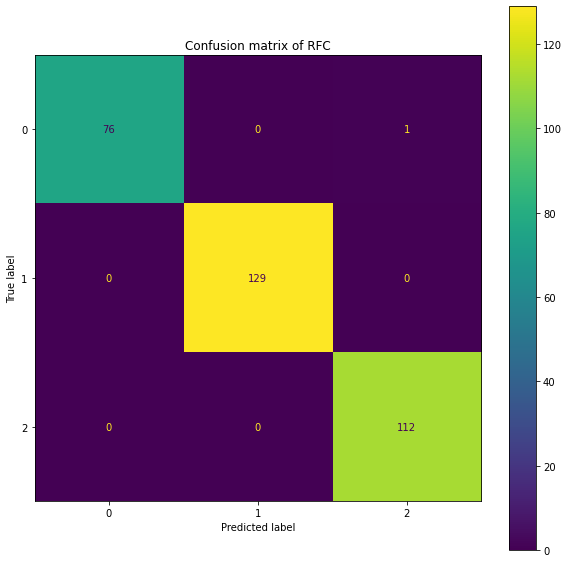

In [17]:
fig,ax=plt.subplots(figsize=(10,10))
PCM=plot_confusion_matrix(RFC,x_test,y_test,ax=ax)
plt.title('Confusion matrix of RFC')
plt.show()

In [18]:
import joblib
joblib.dump(RFC,'rf.pkl')

['rf.pkl']